## **Загрузка результатов тестов и библиотек:**

In [2]:
'''
Цель проекта: 1. Зная личностные особенности и характеристики состояний, которые определяются результатами теста и отдельными шкалами, 
                              а также учитывая их влияние друг на друга, рассчитать базовую оценку профиля личности по тесту MMPI   
              2. Графически изобразить профиль личности для интерпретации результатов

Примечание: 
              Когда понадобится: опросник поможет выявить черты и тип характера, стиль поведения и общения, 
              способность к адаптации и скрытые психические отклонения, профессиональную пригодность. 
              Спрогнозирует вероятность и причины затруднений в различных видах трудовой деятельности.
'''
# https://hr-portal.ru/tool/standartizirovannyy-mnogofaktornyy-metod-issledovaniya-lichnosti-mmpi
# ссылка теста
# ссылка на ключи:  https://psylab.info/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4%D0%B8%D0%BA%D0%B0_%D0%BC%D0%BD%D0%BE%D0%B3%D0%BE%D1%81%D1%82%D0%BE%D1%80%D0%BE%D0%BD%D0%BD%D0%B5%D0%B3%D0%BE_%D0%B8%D1%81%D1%81%D0%BB%D0%B5%D0%B4%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BB%D0%B8%D1%87%D0%BD%D0%BE%D1%81%D1%82%D0%B8/%D0%9A%D0%BB%D1%8E%D1%87%D0%B8_%D0%BA_%D1%82%D0%B5%D1%81%D1%82%D1%83_%D0%9C%D0%9C%D0%98%D0%9B

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/workspaces/codespaces-jupyter/data/test.csv', header = None)
df = df.replace(2,0)

lst=[]

for value, item in df.items():
 lst.extend(item)

fin_lst=[int(x) for x in lst if str(x) != 'nan']
data_dct=dict(zip(range(1,len(fin_lst)+1),fin_lst))


## **Ключи опросника:**

In [3]:
#Создание ответов на опросник

# «L» Ложь

LB = ((0),(0))
LH = 50, 58, 65, 90, 120, 150, 163, 180, 210, 231, 240, 270, 300, 330, 360

# «F» Достоверность
FB = 12, 25, 26, 27, 28, 54, 55, 56, 72, 83, 85, 86, 102, 105, 113, 115, 116, 117, 132, 143, 145, 146, 147, 173, 175, 177, 203, 206, 207, 236, 237, 265, 266, 267, 294, 295, 297, 324, 325, 326, 327, 334, 353, 354, 355, 356, 357
FH = 24, 57, 58, 84, 37, 176, 193, 205, 233, 235, 261, 263, 293, 296, 323, 364

# «К» Коррекция
KB = 340
KH = 8, 13, 38, 43, 73, 94, 98, 103, 124, 128, 133, 154, 158, 163, 188, 193, 217, 218, 223, 253, 277, 280, 282, 283, 310, 312, 313, 342, 372

#«1» Сверхконтроль
B1 = 15, 17, 45, 46, 77, 105, 107, 135, 137, 165, 197, 225, 255, 285, 286, 308, 314, 315, 316, 344, 345, 346, 375, 376
H1 = 16, 47, 75, 131, 167, 195, 254, 284, 374

#«2» Пессимистичность
B2 = 9, 19, 48, 49, 79, 98, 105, 108, 109, 139, 165, 168, 169, 225, 228, 229, 253, 257, 258, 259, 315, 337, 367 
H2 = 18, 20, 41, 43, 50, 75, 78, 124, 131, 137, 138, 161, 163, 167, 193, 198, 199, 223, 227, 244, 254, 277, 284, 287, 288, 289, 317, 318, 319, 338, 347, 348, 349, 368, 370, 377

#«3» Эмоциональная лабильность
B3 = 14, 15, 45, 46, 76, 105, 106, 134, 135, 136, 165, 166, 194, 225, 255, 285, 314, 315, 337, 344, 345, 373, 375
H3 = 8, 11, 16, 38, 41, 43, 44, 71, 73, 74, 75, 101, 103, 104, 124, 133, 155, 163, 164, 184, 187, 195, 196, 214, 218, 224, 226, 248, 254, 256, 278, 280, 284, 343, 370, 374

#«4» Импульсивность
B4 = 40, 42, 70, 72, 100, 102, 132, 162, 190, 191, 192, 221, 222, 247, 250, 251, 252, 281, 311, 337, 341, 367, 369, 371
H4 = 8, 10, 11, 12, 38, 41, 68, 71, 94, 101, 130, 131, 160, 161, 187, 217, 220, 277, 280, 307, 310, 340, 370

#«5-Ж» Женственность
B5g = 1, 3, 5, 32, 62, 64, 93, 94, 122, 151, 152, 154, 181, 213, 242, 243, 273, 274, 301, 302, 303, 304, 331, 332, 334, 361, 362
H5g = 2, 4, 31, 33, 34, 35, 61, 63, 65, 91, 92, 121, 123, 124, 153, 182, 183, 184, 211, 212, 214, 241, 244, 271, 272, 333, 363, 364

#«5-М» Женственность
B5m = 1, 3, 5, 32, 62, 64, 94, 122, 151, 152, 154, 181, 213, 242, 243, 273, 274, 301, 302, 303, 304, 331, 332, 334, 361, 362
H5m = 2, 4, 31, 33, 34, 35, 61, 63, 65, 91, 92, 93, 121, 123, 124, 153, 182, 183, 184, 211, 212, 214, 241, 244, 271, 272, 333, 363, 364

#«6» Ригидность
B6 = 5, 12, 28, 42, 51, 88, 113, 114, 143, 144, 162, 171, 178, 192, 203, 208, 222, 231, 252, 259, 262, 267, 291, 297, 308, 327, 339, 357, 371
H6 = 34, 118, 148, 188, 196, 218, 226, 238, 268, 298, 370

#«7» Тревожность
B7 = 19, 21, 39, 49, 51, 69, 76, 79, 80, 81, 99, 106, 109, 110, 111, 129, 136, 140, 141, 154, 159, 170, 171, 189, 191, 201, 219, 221, 230, 231, 251, 253, 258, 260, 290, 291, 315, 320, 337, 350, 367
H7 = 41, 195, 200, 261, 288, 318, 348

#«8» Индивидуалистичность
B8 = 12, 21, 22, 23, 42, 51, 52, 53, 54, 79, 81, 82, 83, 106, 109, 111, 112, 113, 114, 136, 139, 141, 142, 143, 144, 166, 169, 171, 172, 173, 174, 197, 199, 201, 202, 203, 204, 229, 231, 232, 234, 247, 258, 262, 264, 274, 279, 281, 304, 308, 309, 311, 321, 337, 341, 345, 350, 351, 353, 371, 375, 352
H8 = 24, 41, 84, 233, 249, 263, 283, 292, 293, 322, 323, 348

#«9» Оптимистичность
B9 = 20, 21, 29, 51, 59, 60, 94, 106, 108, 119, 149, 174, 179, 196, 204, 209, 222, 234, 239, 256, 262, 264, 269, 276, 281, 289, 298, 299, 319, 328, 339, 349, 353, 359
H9 = 8, 35, 38, 71, 80, 89, 90, 120, 217, 249, 313, 358

#«10» Интроверсия
B10 = 6, 7, 8, 9, 34, 37, 38, 39, 69, 95, 97, 98, 99, 126, 127, 128, 129, 155, 158, 159, 187, 188, 217, 218, 219, 243, 245, 248, 278, 279, 305, 307, 308, 309, 337, 338, 365, 366, 367
H10 = 4, 36, 66, 67, 68, 96, 125, 156, 157, 185, 186, 189, 215, 216, 246, 247, 249, 273, 275, 276, 277, 303, 306, 333, 335, 336, 339, 363, 368

# Примечание: номера вопросов, которые не следует учитывать при обработке теста:
ignore = 14, 33, 48, 63, 66, 69, 121, 123, 133, 151, 168, 182, 184, 197, 200, 205, 266, 275, 293, 334, 349, 350, 462, 464, 474, 542, 551


dct = { 'L': ({'LB': LB}, {'LH': LH}),
        'F': ({'FB': FB}, {'FH': FH}),
        'K': ({'KB': FB}, {'KH': FH}),
        '1': ({'B1': B1}, {'H1': H1}),
        '2': ({'B2': B2}, {'H2': H2}),
        '3': ({'B3': B3}, {'H3': H3}),
        '4': ({'B4': B4}, {'H4': H4}),
        '5g': ({'B5g': B5g}, {'H5g': H5g}),
        '5m': ({'B5m': B5m}, {'H5m': H5m}),
        '6': ({'B6': B6}, {'H6': H6}),
        '7': ({'B7': B7}, {'H7': H7}),
        '8': ({'B8': B8}, {'H8': H8}),
        '9': ({'B9': B9}, {'H9': H9}),
        '10': ({'B10': B10}, {'H10': H10})
        }

In [4]:
#вытаскиваем заголовки словаря
dct_cycle00 = []
dct_cycle10 = []
dct_cycle11 = []

for item,value in enumerate(dct.items()):
  for item0,value0 in enumerate(value[:1]):
    dct_cycle00.append(value0)
  for item1,value1 in enumerate(value[1][0]):
    dct_cycle10.append(value1)
  for item,value in enumerate(value[1][1]):
    dct_cycle11.append(value)

print(dct_cycle00)
print(dct_cycle10)
print(dct_cycle11)

['L', 'F', 'K', '1', '2', '3', '4', '5g', '5m', '6', '7', '8', '9', '10']
['LB', 'FB', 'KB', 'B1', 'B2', 'B3', 'B4', 'B5g', 'B5m', 'B6', 'B7', 'B8', 'B9', 'B10']
['LH', 'FH', 'KH', 'H1', 'H2', 'H3', 'H4', 'H5g', 'H5m', 'H6', 'H7', 'H8', 'H9', 'H10']


## **Результаты опросника:**

In [5]:
def res_count(indicator,df):
  part_dct=dict(zip(range(len(indicator)),indicator))
  sum=0
  sum_vals=[]
  for key in part_dct:
    if key in df:
      sum_vals.append(df[key])
      sum = sum_vals.count(1)
  return sum

x1=[]
x2=[]

for [i00,i10] in zip(dct_cycle00,dct_cycle10):
    x1.append(res_count(dct[i00][0][i10],data_dct))
for [i00,i11] in zip(dct_cycle00,dct_cycle11):
    x2.append(res_count(dct[i00][1][i11],data_dct))

x = [x1 - x2 for x1,x2 in zip(x1, x2)]
x

[-6, 9, 9, 7, -4, -4, 0, 0, -2, 9, 12, 17, 10, 2]

In [6]:
from numpy import median
def res(indicator,df):
  part_dct=dict(zip(range(len(indicator)),indicator))
  sum_vals=[]
  for key in part_dct:
    if key in df:
      sum_vals.append(df[key])
  return median(sum_vals)

m1=[]
m2=[]

for [i00,i10] in zip(dct_cycle00,dct_cycle10):
    m1.append(res(dct[i00][0][i10],data_dct))
for [i00,i11] in zip(dct_cycle00,dct_cycle11):
    m2.append(res(dct[i00][1][i11],data_dct))

m = [m1 - m2 for m1,m2 in zip(m1, m2)]
m 

[0.5, -1.0, -1.0, -0.5, 0.5, 0.5, -0.5, 0.5, -0.5, 0.0, -1.0, 0.0, 0.0, -0.5]

In [7]:
sigma = [2.435, 3.183, 4.143, 4.470, 5.033,	5.176, 4.119,	3.820,	3.820, 3.295,	4.772, 5.254, 3.816, 7.748]

In [8]:
plus=[0, 0, 0, 0.5, 0, 0, 0.4, 0, 0, 0, 1.0, 1.0, 0.2, 0]

In [9]:
result_T = [round((50 + 10*(x+plus-m)/sigma),1) for (x, m, sigma, plus) in zip(x, m, sigma, plus)]
result_T


[23.3,
 81.4,
 74.1,
 67.9,
 41.1,
 41.3,
 52.2,
 48.7,
 46.1,
 77.3,
 79.3,
 84.3,
 76.7,
 53.2]

## **Рисуем график:**

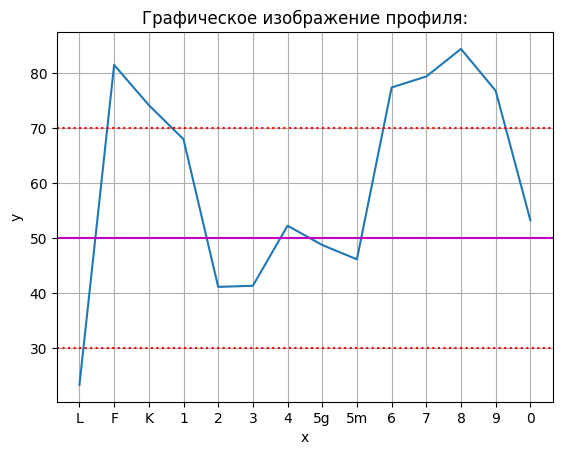

In [10]:
x_ax = ['L','F','K','1','2','3','4','5g','5m','6','7','8','9','0']
# Построение графика
plt.title('Графическое изображение профиля:') # заголовок
plt.xlabel('x') # ось абсцисс
plt.ylabel('y') # ось ординат
plt.grid() # включение отображения сетки
plt.plot(x_ax, result_T)
plt.axhline(y = 50, color = 'm', linestyle = '-')
plt.axhline(y = 70, color = 'r', linestyle = ':')
plt.axhline(y = 30, color = 'r', linestyle = ':')
plt.set_size=(20,20) # построение графика и прямой нормы

## Высчитаем коэффициент Голберга для примера:

In [11]:
final_res = dict(zip(x_ax,result_T))
final_res

{'L': 23.3,
 'F': 81.4,
 'K': 74.1,
 '1': 67.9,
 '2': 41.1,
 '3': 41.3,
 '4': 52.2,
 '5g': 48.7,
 '5m': 46.1,
 '6': 77.3,
 '7': 79.3,
 '8': 84.3,
 '9': 76.7,
 '0': 53.2}

'L': 23.3,
 'F': 75.1,
 'K': 69.3,
 '1': 65.7,
 '2': 41.1,
 '3': 41.3,
 '4': 49.8,
 '5g': 48.7,
 '5m': 43.5,
 '6': 74.3,
 '7': 75.1,
 '8': 84.3,
 '9': 76.7,
 '0': 51.9}

In [12]:
#1. Шкала ипохондрии (HS) 
#2. Шкала депрессии (D)
#3. Шкала истерии (Hy)
#4. Шкала психопатии (Pd)
#5. Шкала маскулинности – феминности (Mf)
#6. Шкала паранойи (Pa)
#7. Шкала психастении (Pt)
#8. Шкала шизофрении (Sc)
#9. Шкала гипомании (Ma) 
#10. Шкала социальной интроверсии (Si)


#Индекс Голдберга (Goldberg L.R., 1955): = (L +  Pa +  Sc) – (Hy +  Pt)
#Фрустрационная толерантность (Beall, Panton, 1957): Ft = (Pd + Ma)/(D + Hy)
Goldberg__index = (final_res['L'] + final_res['6'] + final_res['8'])-(final_res['3'] + final_res['7'])
Goldberg__index


64.29999999999998

In [13]:
Ft = (final_res['4']+final_res['9'])/(final_res['2']+final_res['3'])
Ft

1.5643203883495145